In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import itertools
from collections import Counter
from collections import OrderedDict# order a dict by value
from operator import itemgetter
from scipy import spatial# to test cosine formula
%matplotlib inline

In [2]:
from math import *

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerateur = sum(a*b for a,b in zip(x,y))
    denominateur = square_rooted(x)*square_rooted(y)
    return round(float(numerateur/denominateur),3)

def mahalanobis_similarity(x,y,z):
    numerateur = (x-y)# x= User's visit duration; y= mean of visit durations
    denominateur = z # z = standart deviation of visit durations
    return round(sqrt(pow(numerateur/denominateur,2)),3)



In [3]:
def num_missing(m):
     return sum(m.isnull())

In [4]:
# calculate the  features ' Partner'
# Create functions that can transform features of 'Partner' notion
def partner(row):
    if row ==1:
        no_partner=1
    else:
        no_partner=0
    return no_partner
def partner1(row):
    if row ==2:
        partner1=1
    else:
        partner1=0
    return partner1  
def partner2(row):
    if 2< row < 5:
        partner34=1
    else:
        partner34=0
    return partner34 
def partnergr(row):
    if row >4:
        partnergr=1
    else:
        partnergr=0
    return partnergr

# calculate the  features 'Novelty'
def novelty(row):
    if row==1:
        first=1
    else:
        first=0
    return first

def returning(row):
    if row==2:
        returning=1
    else:
        returning=0
    return returning

def returning1(row):
    if row>2:
        returning1=1
    else:
        returning1=0  
    return returning1

# calculate the  features ' Ticket level'
def level1(row):
     if row<=X['avg_ticketU'].describe()[4]:
            level1=1 # but that would be interessting to test with real values 
     else:
        level1=0
     return level1

def level2(row):
    if X['avg_ticketU'].describe()[4] < row <= X['avg_ticketU'].describe()[5]:
        level2=1 # would be interessting to test with  real values
    else:
        level2=0
    return level2

def level3(row):
    if X['avg_ticketU'].describe()[5] < row <= X['avg_ticketU'].describe()[6]:
        level3=1 # would be interessting to test with real values
    else:
        level3=0
    return level3

def level4(row):
    if row >= X['avg_ticketU'].describe()[6]:
        level4=1
    else:
        level4=0
    return level4

In [5]:
# making a function to display different matrix
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [6]:
X=pd.read_csv('C:/Users/Pham Antoine/X.csv',sep=',')
Y=pd.read_csv('C:/Users/Pham Antoine/Y.csv',sep=',')

In [7]:
X_test_event=pd.read_csv('C:/Users/Pham Antoine/X_test_event.csv',sep=',')
Y_test_event=pd.read_csv('C:/Users/Pham Antoine/Y_test_event.csv',sep=',')
X_test=pd.read_csv('C:/Users/Pham Antoine/X_test.csv',sep=',')
Y_test=pd.read_csv('C:/Users/Pham Antoine/Y_test.csv',sep=',')
X_scaled_test_event=pd.read_csv('C:/Users/Pham Antoine/X_scaled_test_event.csv',sep=',')
X_scaled_test=pd.read_csv('C:/Users/Pham Antoine/X_scaled_test.csv',sep=',')

In [8]:
event_order_test=pd.read_csv('C:/Users/Pham Antoine/event_order_test.csv',sep=',')
To_context_labels1=pd.read_csv('C:/Users/Pham Antoine/To_context_labels1.csv',sep=',')
M_prob=pd.read_csv('C:/Users/Pham Antoine/M_prob.csv',sep=',')
IT_PROFILE=pd.read_csv('C:/Users/Pham Antoine/IT_PROFILE.csv',sep=',')
visit_duration_stat=pd.read_csv('C:/Users/Pham Antoine/visit_duration_stat.csv',sep=',')
IT_nbdiner_weighted=pd.read_csv('C:/Users/Pham Antoine/IT_nbdiner_weighted.csv',sep=',')
It_return_cust_weighted=pd.read_csv('C:/Users/Pham Antoine/It_return_cust_weighted.csv',sep=',')
IT_ticketlevel_weighted_profile=pd.read_csv('C:/Users/Pham Antoine/IT_ticketlevel_weighted_profile.csv',sep=',')
It_event_weighted=pd.read_csv('C:/Users/Pham Antoine/It_event_weighted.csv',sep=',')

In [9]:
visit_duration_stat=pd.read_csv('C:/Users/Pham Antoine/visit_duration_stat.csv',sep=',')

In [10]:
event_order=pd.read_csv('C:/Users/Pham Antoine/event_order.csv',sep=',')

In [11]:
display('X.head(1)','Y.head(1)','X_test_event.head(1)','Y_test_event.head(1)','X_test.head(1)','Y_test.head(1)','X_scaled_test_event.head(1)',
       'X_scaled_test.head(1)','event_order_test.head(1)','To_context_labels1.head(1)','M_prob.head(1)',
       'IT_PROFILE.head(1)','visit_duration_stat.head(1)','IT_nbdiner_weighted.head(1)','It_return_cust_weighted.head(1)',
       'IT_ticketlevel_weighted_profile.head(1)','It_event_weighted.head(1)','event_order.head(1)')

X.head(1)
   D.OrderHeaderID  D.PersonID  user_visit  H.NbDiners  nb_visits  \
0             1204       10404           0           2          1   

   avg_ticketU  pch_freq  visit_duration  TemperatureC  Humidity  \
0         13.0       0.0       16.022717            22        43   

  Wind_Direction Conditions  DoW  DoM  WoY  MoY  QoY  schedule   H       HMS  
0            ENE      Clear    2    3   40   10    4  no_event  17  17:30:00  

Y.head(1)
   D.OrderHeaderID  D.PersonID  ABATILLES PLATES  ABATILLES RED  AVECESAR  \
0                1         136                 0              0         0   

   BADOIT 33cl  BAILEYS  BIERE SANS GLUTEN  Boisson Rouge  BRIE     ...      \
0            0        0                  0              0     0     ...       

   VERRE MAX CUVEE  VERRE PAPOLLE BLANC MOEL  VERRE PAPOLLE BLANC SEC  \
0                0                         0                        0   

   VERRE PAPOLLE ROSE  VERRE PAPOLLE ROUGE  Verre Rosé la Colombette  VODKA  \
0                   0                    0                         0      0   

   WHISKY  XAMAX  XAMAX MENU  
0       0      0           0  

[1 rows x 127 columns]

X_test_event.head(1)
   Unnamed: 0  Unnamed: 1  user_visit  H.NbDiners  nb_visits  avg_ticketU  \
0        1204       10403           0           2          1         18.5   

   pch_freq  visit_duration  TemperatureC  Humidity Wind_Direction Conditions  \
0       0.0       16.527333            22        43            ENE      Clear   

   DoW  DoM  WoY  MoY  QoY  schedule   H       HMS  
0    2    3   40   10    4  no_event  17  17:30:00  

Y_test_event.head(1)
   Unnamed: 0  Unnamed: 1  ABATILLES PLATES  ABATILLES RED  AVECESAR  \
0        1204       10403                 0              0         0   

   BADOIT 33cl  BAILEYS  BIERE SANS GLUTEN  Boisson Rouge  BRIE     ...      \
0            0        0                  0              0     0     ...       

   VERRE MAX CUVEE  VERRE PAPOLLE BLANC MOEL  VERRE PAPOLLE BLANC SEC  \
0                0                         0                        0   

   VERRE PAPOLLE ROSE  VERRE PAPOLLE ROUGE  Verre Rosé la Colombette  VODKA  \
0                   0                    0                         0      0   

   WHISKY  XAMAX  XAMAX MENU  
0       0      0           0  

[1 rows x 127 columns]

X_test.head(1)
   D.OrderHeaderID  D.PersonID  user_visit  H.NbDiners  nb_visits  \
0             1204       10403           0           2          1   

   avg_ticketU  pch_freq  visit_duration  TemperatureC  Humidity  \
0         18.5       0.0       16.527333            22        43   

  Wind_Direction Conditions  DoW  DoM  WoY  MoY  QoY  schedule   H       HMS  
0            ENE      Clear    2    3   40   10    4  no_event  17  17:30:00  

Y_test.head(1)
   D.OrderHeaderID  D.PersonID  ABATILLES PLATES  ABATILLES RED  AVECESAR  \
0                3         230                 0              0         0   

   BADOIT 33cl  BAILEYS  BIERE SANS GLUTEN  Boisson Rouge  BRIE     ...      \
0            0        0                  0              0     0     ...       

   VERRE MAX CUVEE  VERRE PAPOLLE BLANC MOEL  VERRE PAPOLLE BLANC SEC  \
0                0                         0                        0   

   VERRE PAPOLLE ROSE  VERRE PAPOLLE ROUGE  Verre Rosé la Colombette  VODKA  \
0                   0                    0                         0      0   

   WHISKY  XAMAX  XAMAX MENU  
0       0      0           0  

[1 rows x 127 columns]

X_scaled_test_event.head(1)
   Unnamed: 0  Unnamed: 1  user_visit  H.NbDiners  nb_visits  avg_ticketU  \
0        1204       10403         0.0         0.1        0.0     0.098407   

   pch_freq  visit_duration  TemperatureC  Humidity        ...          \
0       0.0        0.027319         0.625  0.373626        ...           

   Wind_Direction_SW  Wind_Direction_South  Wind_Direction_Variable  \
0                  0                     0                        0   

   Wind_Direction_WNW  Wind

In [12]:
X=X.set_index(['D.OrderHeaderID','D.PersonID'])
Y=Y.set_index(['D.OrderHeaderID','D.PersonID'])

In [13]:
X_test_event=X_test_event.rename(columns={'Unnamed: 0':'D.OrderHeaderID','Unnamed: 1':'D.PersonID'})

In [14]:
X_test_event=X_test_event.set_index(['D.OrderHeaderID','D.PersonID'])

In [15]:
X_test_event.head(1)

,,user_visit,H.NbDiners,nb_visits,avg_ticketU,pch_freq,visit_duration,TemperatureC,Humidity,Wind_Direction,Conditions,DoW,DoM,WoY,MoY,QoY,schedule,H,HMS
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,
1204,10403,0,2,1,18.5,0.0,16.527333,22,43,ENE,Clear,2,3,40,10,4,no_event,17,17:30:00


In [16]:
np.unique(X_test_event['Wind_Direction'])

array(['Calm', 'ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North',
       'SE', 'SSE', 'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West'], dtype=object)

In [17]:
Y_test_event=Y_test_event.rename(columns={'Unnamed: 0':'D.OrderHeaderID','Unnamed: 1':'D.PersonID'})
Y_test_event=Y_test_event.set_index(['D.OrderHeaderID','D.PersonID'])


In [18]:
X_test=X_test.set_index(['D.OrderHeaderID','D.PersonID'])


In [19]:
Y_test=Y_test.set_index(['D.OrderHeaderID','D.PersonID'])

In [20]:
X_scaled_test_event=X_scaled_test_event.rename(columns={'Unnamed: 0':'D.OrderHeaderID','Unnamed: 1':'D.PersonID'})
X_scaled_test_event=X_scaled_test_event.set_index(['D.OrderHeaderID','D.PersonID'])

In [21]:
X_scaled_test=X_scaled_test.set_index(['D.OrderHeaderID','D.PersonID'])

In [22]:
event_order_test=event_order_test.rename(columns={'Unnamed: 0':'D.OrderHeaderID','Unnamed: 1':'D.PersonID'})
event_order_test=event_order_test.set_index(['D.OrderHeaderID','D.PersonID'])

In [23]:
To_context_labels1=To_context_labels1.rename(columns={'Unnamed: 0':'D.OrderHeaderID','Unnamed: 1':'D.PersonID'})
To_context_labels1=To_context_labels1.set_index(['D.OrderHeaderID','D.PersonID'])

In [24]:
M_prob=M_prob.set_index(['Unnamed: 0'])
M_prob.index.name=None

In [25]:
IT_PROFILE=IT_PROFILE.set_index(['Unnamed: 0'])
IT_PROFILE.index.name=None

In [26]:
visit_duration_stat=visit_duration_stat.set_index(['Unnamed: 0'])
visit_duration_stat.index.name=None

In [27]:
IT_nbdiner_weighted=IT_nbdiner_weighted.drop(['Unnamed: 0'],axis=1)

In [28]:
It_return_cust_weighted=It_return_cust_weighted.drop(['Unnamed: 0'],axis=1)

In [29]:
IT_ticketlevel_weighted_profile=IT_ticketlevel_weighted_profile.drop(['Unnamed: 0'],axis=1)

In [30]:
It_event_weighted=It_event_weighted.set_index(['Unnamed: 0'])
It_event_weighted.index.name=None

In [31]:
event_order=event_order.rename(columns={'PersonID':'D.PersonID'})
event_order=event_order.set_index(['D.OrderHeaderID','D.PersonID'])

In [32]:
display('X.head(1)','Y.head(1)','X_test_event.head(1)','Y_test_event.head(1)','X_test.head(1)','Y_test.head(1)','X_scaled_test_event.head(1)',
       'X_scaled_test.head(1)','event_order_test.head(1)','To_context_labels1.head(1)','M_prob.head(1)',
       'IT_PROFILE.head(1)','visit_duration_stat.head(1)','IT_nbdiner_weighted.head(1)','It_return_cust_weighted.head(1)',
       'IT_ticketlevel_weighted_profile.head(1)','It_event_weighted.head(1)','event_order.head(1)')

X.head(1)
                            user_visit  H.NbDiners  nb_visits  avg_ticketU  \
D.OrderHeaderID D.PersonID                                                   
1204            10404                0           2          1         13.0   

                            pch_freq  visit_duration  TemperatureC  Humidity  \
D.OrderHeaderID D.PersonID                                                     
1204            10404            0.0       16.022717            22        43   

                           Wind_Direction Conditions  DoW  DoM  WoY  MoY  QoY  \
D.OrderHeaderID D.PersonID                                                      
1204            10404                 ENE      Clear    2    3   40   10    4   

                            schedule   H       HMS  
D.OrderHeaderID D.PersonID                          
1204            10404       no_event  17  17:30:00  

Y.head(1)
                            ABATILLES PLATES  ABATILLES RED  AVECESAR  \
D.OrderHeaderID D.PersonID                                              
1               136                        0              0         0   

                            BADOIT 33cl  BAILEYS  BIERE SANS GLUTEN  \
D.OrderHeaderID D.PersonID                                            
1               136                   0        0                  0   

                            Boisson Rouge  BRIE  CAFEGOURMAND  \
D.OrderHeaderID D.PersonID                                      
1               136                     0     0             0   

                            CAFEGOURMANDMENU     ...      VERRE MAX CUVEE  \
D.OrderHeaderID D.PersonID                       ...                        
1               136                        0     ...                    0   

                            VERRE PAPOLLE BLANC MOEL  VERRE PAPOLLE BLANC SEC  \
D.OrderHeaderID D.PersonID                                                      
1               136                                0                        0   

                            VERRE PAPOLLE ROSE  VERRE PAPOLLE ROUGE  \
D.OrderHeaderID D.PersonID                                            
1               136                          0                    0   

                            Verre Rosé la Colombette  VODKA  WHISKY  XAMAX  \
D.OrderHeaderID D.PersonID                                                   
1               136                                0      0       0      0   

                            XAMAX MENU  
D.OrderHeaderID D.PersonID              
1               136                  0  

[1 rows x 125 columns]

X_test_event.head(1)
                            user_visit  H.NbDiners  nb_visits  avg_ticketU  \
D.OrderHeaderID D.PersonID                                                   
1204            10403                0           2          1         18.5   

                            pch_freq  visit_duration  TemperatureC  Humidity  \
D.OrderHeaderID D.PersonID                                                     
1204            10403            0.0       16.527333            22        43   

                           Wind_Direction Conditions  DoW  DoM  WoY  MoY  QoY  \
D.OrderHeaderID D.PersonID                                                      
1204            10403                 ENE      Clear    2    3   40   10    4   

                            schedule   H       HMS  
D.OrderHeaderID D.PersonID                          
1204            10403       no_event  17  17:30:00  

Y_test_event.head(1)
                            ABATILLES PLATES  ABATILLES RED  AVECESAR  \
D.OrderHeaderID D.PersonID                                              
1204            10403                      0              0         0   

                            BADOIT 33cl  BAILEYS  BIERE SANS GLUTEN  \
D.OrderHeaderID D.PersonID                                            
1204            10403                 0        0                  0   

                            Boisson Rouge

# EVALUATION

EVENT'S COMPONENT

The matrix of probababilities for events is as following


In [33]:
It_event_weighted.tail(2)

,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
YouTube,0.00000,0.006674,0.005562,0.002225,0.003337,0.000000,0.002225,0.008899,0.048943,0.022247,...,0.010011,0.005562,0.001112,0.005562,0.004449,0.001112,0.001112,0.002225,0.012236,0.002225
animatedUserControl,0.00055,0.000800,0.001476,0.000500,0.000375,0.000225,0.000125,0.001026,0.007930,0.002777,...,0.001401,0.000575,0.000600,0.000800,0.000750,0.000450,0.000125,0.000325,0.003377,0.000675


In [34]:
It_event_weighted.shape

(168, 125)

In [35]:
event_order_test.head(2)

,,20,43,44,5,6,ABATILLES PLATES_event,ABATILLES RED_event,ACCOMPAGNEMENTS,APERITIFS,AVECESAR_event,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1206,10408,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
event_order_test.shape

(1683, 293)

Let's calculate the matrix which evaluate the model on the test set'

Attention: the dimension of the data set 'event_order_test' is 1683x293 since there are also columns describing the outcomes ( Y_test).

The dimension of the probability matrix It_event_weighted is  168x125, so we will have to unselect from 'event_order_test' the columns describing the outcomes of the model

In [37]:
event_order.columns

Index(['20', '43', '44', '5', '6', 'ABATILLES PLATES_event',
       'ABATILLES RED_event', 'ACCOMPAGNEMENTS', 'APERITIFS', 'AVECESAR_event',
       ...
       'VODKA_event', 'Verre Rosé la Colombette_event',
       'Verre de Boisson Rouge_event', 'Verre de Bordeaux Rouge Agape_event',
       'Video', 'WHISKY_event', 'WebCam', 'XAMAX_event', 'YouTube',
       'animatedUserControl'],
      dtype='object', length=168)

In [38]:
((x,y) for x in event_order_test.loc[:,event_order.columns].values for y in It_event_weighted.T.values )
event_order_testpred=[cosine_similarity(x,y) for x in event_order_test.loc[:,event_order.columns].values for y in It_event_weighted.T.values]
event_order_testpred=np.array(event_order_testpred).reshape(1683,125)
event_order_testpred= pd.DataFrame( event_order_testpred, columns=It_event_weighted.columns, index=event_order_test.index)
event_order_testpred.shape

(1683, 125)

In [39]:
event_order_testpred.tail(1)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
4502,43439,0.008,0.012,0.03,0.009,0.02,0.004,0.004,0.023,0.072,0.059,...,0.029,0.015,0.011,0.013,0.019,0.005,0.006,0.01,0.064,0.035


In [40]:
# this is for test
1-spatial.distance.cosine(event_order_test.loc[4502,event_order.columns].values,It_event_weighted['XAMAX MENU'].values)

0.034970540575788966

In [41]:
event_order_testpred.loc[4502,['XAMAX MENU']]

,XAMAX MENU
D.PersonID,
43439,0.035


In [42]:
# Check Na's values by function 'num_missing'
[{k:v for k,v in (event_order_testpred.apply(num_missing, axis=0).to_dict()).items() if v>0}]

[{}]

CONTEXTS' SIMILARITY

In [43]:
To_context_labels1.head(1)

,,TemperatureC,Humidity,DoW,DoM,WoY,MoY,QoY,H,Conditions_Clear,Conditions_Fog,...,Wind_Direction_West,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event,4_contexts,6_contexts,8_contexts,10_contexts,12_contexts
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10404,0.625,0.373626,0.166667,0.066667,0.75,0.818182,1.0,0.6,1,0,...,0,0,0,0,1,0,1,0,4,4


In [155]:
To_context_labels1.shape

(7455, 54)

In [44]:
X_scaled_test.head(1)

,,user_visit,H.NbDiners,nb_visits,avg_ticketU,pch_freq,visit_duration,TemperatureC,Humidity,DoW,DoM,...,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.0,0.1,0.0,0.098407,0.0,0.027319,0.625,0.373626,0.166667,0.066667,...,0,0,0,0,0,0,0,0,0,1


In [45]:
To_context_test=X_scaled_test.loc[:,['TemperatureC', 'Humidity', 'DoW', 'DoM', 'WoY',
       'MoY', 'QoY', 'H', 'Conditions_Clear', 'Conditions_Fog',
       'Conditions_Heavy Fog', 'Conditions_Heavy Rain',
       'Conditions_Heavy Thunderstorms and Rain', 'Conditions_Light Drizzle',
       'Conditions_Light Rain', 'Conditions_Light Rain Showers',
       'Conditions_Mist', 'Conditions_Mostly Cloudy', 'Conditions_Overcast',
       'Conditions_Partial Fog', 'Conditions_Partly Cloudy',
       'Conditions_Patches of Fog', 'Conditions_Rain',
       'Conditions_Scattered Clouds', 'Conditions_Thunderstorm',
       'Conditions_Thunderstorms and Rain', 'Conditions_Unknown',
       'Wind_Direction_Calm',
       'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_East',
       'Wind_Direction_NE', 'Wind_Direction_NNE', 'Wind_Direction_NNW',
       'Wind_Direction_NW', 'Wind_Direction_North', 'Wind_Direction_SE',
       'Wind_Direction_SSE', 'Wind_Direction_SSW', 'Wind_Direction_SW',
       'Wind_Direction_South', 'Wind_Direction_Variable', 'Wind_Direction_WNW',
       'Wind_Direction_WSW', 'Wind_Direction_West', 'schedule_a_day_off',
       'schedule_before_aday_off', 'schedule_holidays', 'schedule_no_event']]

In [46]:
X_scaled_test.head(5)

,,user_visit,H.NbDiners,nb_visits,avg_ticketU,pch_freq,visit_duration,TemperatureC,Humidity,DoW,DoM,...,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.0,0.1,0.0,0.098407,0.0,0.027319,0.625,0.373626,0.166667,0.066667,...,0,0,0,0,0,0,0,0,0,1
1206,10408,0.0,0.1,0.0,0.088097,0.0,0.059256,0.600,0.373626,0.166667,0.066667,...,0,0,0,0,0,0,0,0,0,1
1208,10412,0.0,0.1,0.0,0.099344,0.0,0.020301,0.700,0.274725,0.333333,0.100000,...,0,0,0,0,0,0,0,0,0,1
1211,10422,0.0,0.1,0.0,0.093721,0.0,0.018875,0.550,0.758242,0.500000,0.133333,...,0,0,0,0,0,1,0,0,0,1
1213,10429,0.0,0.1,0.0,0.103093,0.0,0.103738,0.575,0.560440,0.500000,0.133333,...,0,0,0,0,0,1,0,0,0,1


In [47]:
np.ravel(To_context_labels1.loc[:,['4_contexts']])

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
# Buid a classifier by training  a Nearest centroid based model on the train set ( To_context_test).
 # Note that the number of context selected is 10

from sklearn.neighbors.nearest_centroid import NearestCentroid
clf_clust = NearestCentroid(metric='euclidean',shrink_threshold=None)
clf_clust.fit(To_context_labels1.loc[:,To_context_test.columns], np.ravel(To_context_labels1.loc[:,['10_contexts']].astype(int)))#NOTE: necessary to astype(int)
#NearestCentroid(metric='euclidean', shrink_threshold=None)

NearestCentroid(metric='euclidean', shrink_threshold=None)

#Export and save this model to disk

from sklearn.externals import joblib

joblib.dump(clf_clust, 'cluster_model.pkl') 

clf_clust1 = joblib.load('cluster_model.pkl') # reload the fit model

pd.DataFrame(clf_clust1.predict(To_context_test))[0].value_counts()
#use the fit model to predict on new data
#that looks good

In [49]:
To_context_labels1['10_contexts'].value_counts()

4    3802
9    2958
1     203
2     188
6     179
8      56
0      34
3      26
7       6
5       3
Name: 10_contexts, dtype: int64

In [50]:
# Making prediction on the test set ( To_context_test) in order to get predicted clust each test record belongs to
# this model has been exported and saved to disk
pd.DataFrame(clf_clust.predict(To_context_test))[0].value_counts()

4    1172
9     946
0      81
2      78
1      65
6      56
3      46
8      32
7       5
5       4
Name: 0, dtype: int64

In [160]:
To_context_test.shape

(2485, 49)

In [51]:
clust_label=pd.DataFrame(clf_clust.predict(To_context_test))

In [52]:
clust_label=clust_label.rename(columns={0:'context'})

In [53]:
clust_label.head(1)

,context
0,4


In [54]:
clust_label['context'].value_counts()

4    1172
9     946
0      81
2      78
1      65
6      56
3      46
8      32
7       5
5       4
Name: context, dtype: int64

In [55]:
clust_label.shape

(2485, 1)

In [56]:
# add the column 'context' to the data set To_context_test
To_context_testpred=pd.concat([To_context_test,clust_label],axis=1,join_axes=[To_context_test.index])
# Adding join_axe is important

In [57]:
# the column 'label' has been added but not it's values, getting back these values
To_context_testpred['context']=clust_label['context'].values

In [58]:
#take a look at the records found in the context N°7
To_context_testpred.loc[To_context_testpred['context']==7,:]

TemperatureC  Humidity       DoW       DoM  \
D.OrderHeaderID D.PersonID                                               
1809            14050              0.200  0.857143  0.000000  0.000000   
1810            14058              0.200  0.857143  0.000000  0.000000   
                14062              0.200  0.857143  0.000000  0.000000   
2085            18573              0.325  0.681319  0.166667  0.166667   
185             5846               0.425  0.692308  0.166667  0.500000   

                                 WoY       MoY       QoY         H  \
D.OrderHeaderID D.PersonID                                           
1809            14050       0.000000  0.000000  0.000000  0.333333   
1810            14058       0.000000  0.000000  0.000000  0.533333   
                14062       0.000000  0.000000  0.000000  0.533333   
2085            18573       0.096154  0.090909  0.000000  0.266667   
185             5846        0.365385  0.363636  0.333333  0.133333   

                            Conditions_Clear  Conditions_Fog   ...     \
D.OrderHeaderID D.PersonID                                     ...      
1809            14050                      0               0   ...      
1810            14058                      0               0   ...      
                14062                      0               0   ...      
2085            18573                      0               0   ...      
185             5846                       0               0   ...      

                            Wind_Direction_South  Wind_Direction_Variable  \
D.OrderHeaderID D.PersonID                                                  
1809            14050                          0                        0   
1810            14058                          0                        0   
                14062                          0                        0   
2085            18573                          0                        0   
185             5846                           0                        0   

                            Wind_Direction_WNW  Wind_Direction_WSW  \
D.OrderHeaderID D.PersonID                                           
1809            14050                        0                   0   
1810            14058                        0                   0   
                14062                        0                   0   
2085            18573                        0                   0   
185             5846                         0                   0   

                            Wind_Direction_West  schedule_a_day_off  \
D.OrderHeaderID D.PersonID                                            
1809            14050                         0                   1   
1810            14058                         0                   1   
                14062                         0                   1   
2085            18573                         0                   0   
185             5846                          0                   1   

                            schedule_before_aday_off  schedule_holidays  \
D.OrderHeaderID D.PersonID                                                
1809            14050                              0                  0   
1810            14058                              0                  0   
                14062                              0                  0   
2085            18573                              0                  0   
185             5846                               0                  0   

                            schedule_no_event  context  
D.OrderHeaderID D.PersonID                              
1809            14050                       0        7  
1810            14058                       0        7  
                14062                       0        7  
2085            18573                       1        7  
185             5846                        0        7  

[5 rows x 50 columns]

In [59]:
# subset the test set so that this one has the same records as the outcome data set ( Y_test_event)
To_context_testpred=To_context_testpred.loc[event_order_test.index,:]

In [60]:
To_context_testpred.shape

(1683, 50)

In [61]:
# calculate for each User in the test set the probabilites he/she buy an item according to the context  he/she belongs to
To_context_testpred[['context']].head(1)

,,context
D.OrderHeaderID,D.PersonID,
1204,10403,4


In [62]:
# So far, we have obtained by training a model based on Bayes ' aproach the following matrix
M_prob.head(1)

,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
Context_1,0.007322,0.000065,0.007322,0.000065,0.000065,0.000065,0.000065,0.000065,0.021967,0.014644,...,0.021967,0.007322,0.000065,0.000065,0.007322,0.000065,0.000065,0.000065,0.007322,0.007322


In [63]:
# Let's make somme data preparations 
# add 'Context_' as string before the number of the context; i+1 since i starts from 0
To_context_testpred[['context']]=['Context_%s' %(i+1) for i in To_context_testpred['context']]

In [64]:
To_context_testpred.head(1)

,,TemperatureC,Humidity,DoW,DoM,WoY,MoY,QoY,H,Conditions_Clear,Conditions_Fog,...,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event,context
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.625,0.373626,0.166667,0.066667,0.75,0.818182,1.0,0.6,1,0,...,0,0,0,0,0,0,0,0,1,Context_5


In [65]:
To_context_testpred['context'].value_counts()

Context_5     808
Context_10    585
Context_1      77
Context_3      57
Context_2      47
Context_7      41
Context_4      34
Context_9      26
Context_8       4
Context_6       4
Name: context, dtype: int64

In [66]:
#  to get probabilities of buying an item for each records join (see ' Merge, join, concat..with pandas'p.40)
To_context_testpred=To_context_testpred[['context']].join(M_prob,on='context')
#left.join(right, on='key')

In [67]:
To_context_testpred[1000:1002]

,,context,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
2861,30140,Context_7,0.001391,0.004172,0.005563,0.004172,0.000065,0.000065,0.000065,0.005563,0.025035,...,0.004172,0.009736,0.002782,0.004172,0.006954,0.000065,0.000065,0.002782,0.013908,0.002782
2862,30147,Context_7,0.001391,0.004172,0.005563,0.004172,0.000065,0.000065,0.000065,0.005563,0.025035,...,0.004172,0.009736,0.002782,0.004172,0.006954,0.000065,0.000065,0.002782,0.013908,0.002782


In [68]:
Counter(To_context_testpred.iloc[1000,1:].to_dict()).most_common(5)

[('PATATEDOUCE', 0.10570216719479192),
 ('GROSSEFRITE', 0.1043113492053868),
 ('MAXIFLETTE', 0.068150081480852692),
 ('MAXINUS', 0.036161267724534082),
 ('MAXPARTOUT', 0.026425541798697983)]

SIMILARITY BETWEEN  ITEM'S PROFILE & USER'S PROFILE

In [69]:
IT_PROFILE.tail(1)

,no_partner,1partner,2_3partners,group,1st time,2nd time,more than 2,tlevel_1,tlevel_2,tlevel_3,tlevel_4
XAMAX MENU,0.137744,0.497892,0.272061,0.092303,0.971389,0.020144,0.008466,0.001389,0.178569,0.619148,0.200894


In [70]:
X_test_event.head(1)

,,user_visit,H.NbDiners,nb_visits,avg_ticketU,pch_freq,visit_duration,TemperatureC,Humidity,Wind_Direction,Conditions,DoW,DoM,WoY,MoY,QoY,schedule,H,HMS
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,
1204,10403,0,2,1,18.5,0.0,16.527333,22,43,ENE,Clear,2,3,40,10,4,no_event,17,17:30:00


In [71]:
X_scaled_test_event.head(1)

,,user_visit,H.NbDiners,nb_visits,avg_ticketU,pch_freq,visit_duration,TemperatureC,Humidity,DoW,DoM,...,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Variable,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,schedule_a_day_off,schedule_before_aday_off,schedule_holidays,schedule_no_event
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.0,0.1,0.0,0.098407,0.0,0.027319,0.625,0.373626,0.166667,0.066667,...,0,0,0,0,0,0,0,0,0,1


In order to make evaluation , we need firstly to transform the input data set so that it's possible to compute the similariy between items and users, that means the columns of the input data set must be the same as those of the data set IT_PROFILE

In [72]:
X_test_event_tf=pd.concat([pd.DataFrame(X_test_event['H.NbDiners'].apply(partner)),
           pd.DataFrame(X_test_event['H.NbDiners'].apply(partner1)),
           pd.DataFrame(X_test_event['H.NbDiners'].apply(partner2)),
           pd.DataFrame(X_test_event['H.NbDiners'].apply(partnergr)),
           pd.DataFrame(X_test_event['nb_visits'].apply(novelty)),
           pd.DataFrame(X_test_event['nb_visits'].apply(returning)),
           pd.DataFrame(X_test_event['nb_visits'].apply(returning1)),
           pd.DataFrame(X_test_event['avg_ticketU'].apply(level1)),
           pd.DataFrame(X_test_event['avg_ticketU'].apply(level2)),
           pd.DataFrame(X_test_event['avg_ticketU'].apply(level3)),
           pd.DataFrame(X_test_event['avg_ticketU'].apply(level4))],axis=1)

In [73]:
X_test_event_tf.columns=IT_PROFILE.columns

In [74]:
X_test_event_tf.shape

(1683, 11)

In [75]:
X_test_event_tf.head(1)

,,no_partner,1partner,2_3partners,group,1st time,2nd time,more than 2,tlevel_1,tlevel_2,tlevel_3,tlevel_4
D.OrderHeaderID,D.PersonID,,,,,,,,,,,
1204,10403,0,1,0,0,1,0,0,0,0,1,0


In [76]:
((x,y) for x in X_test_event_tf.index for y in IT_PROFILE.index)
X_test_eventpred=[cosine_similarity(x,y) for x in X_test_event_tf.values for y in IT_PROFILE.values]

In [77]:
X_test_eventpred=np.array(X_test_eventpred).reshape(X_test_event.shape[0],IT_PROFILE.shape[0])
X_test_eventpred=pd.DataFrame(X_test_eventpred, index=X_test_event.index,columns=IT_PROFILE.index)

In [78]:
X_test_eventpred.head(1)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.541,0.748,0.649,0.69,0.573,0.478,0.473,0.52,0.773,0.732,...,0.778,0.824,0.585,0.765,0.708,0.35,0.476,0.573,0.739,0.911


In [79]:
Counter(X_test_eventpred.iloc[0,:].to_dict()).most_common(30)

[('XAMAX MENU', 0.91100000000000003),
 ('THE', 0.91000000000000003),
 ('Dessert du jour', 0.874),
 ('THE GLACE', 0.83699999999999997),
 ('SOUPEFRUIT', 0.83299999999999996),
 ('CREMEBRULEE', 0.83199999999999996),
 ('HAMBOURGEOIS DU MOMENT MENU', 0.82699999999999996),
 ('MAXPARTOUT MENU', 0.82599999999999996),
 ('VERRE PAPOLLE BLANC MOEL', 0.82399999999999995),
 ('CROQUANT', 0.81999999999999995),
 ('SALADEASIAT', 0.81100000000000005),
 ('PLANTAMAX MENU', 0.81000000000000005),
 ('MAXCOCOTTE MENU', 0.80700000000000005),
 ('PESTO', 0.80700000000000005),
 ('JUS FRUIT MAISON', 0.80500000000000005),
 ('MAXCHAMPETRE MENU', 0.80500000000000005),
 ('PATATEDOUCE', 0.80000000000000004),
 ('MAXYONNAISE', 0.79800000000000004),
 ('GATEAUCAROTTE', 0.79500000000000004),
 ('MENU HAMBOURGEOIS', 0.79400000000000004),
 ('MAXINUS MENU', 0.79000000000000004),
 ('MAXIFLETTE', 0.78500000000000003),
 ('COCA', 0.78000000000000003),
 ('VERRE MAX CUVEE', 0.77800000000000002),
 ('CAFEGOURMAND', 0.77300000000000002),

In [80]:
Counter({k: v for k, v in Counter(Y_test.ix[1204,10403].to_dict()).items() if v >0})

C:\Users\Pham Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Counter({'GROSSEFRITE': 1, 'MAXIFLETTE': 1, 'MOUSSECHOCO': 1})

MAHALANOBIS DISTANCE

In order to compute the Mahalanobis distance we need 3 elements: x= the user's , y= the mean of the visit duration of the train set and z= standart deviation of this one.

Let's buid a list containing y,z for each item. This list will be used to iterate over every user on the test set

In [81]:
l1=np.array(visit_duration_stat.loc[:,['mean_visit_duration','std_visit_duration']]).tolist()

In [82]:
len(l1)

125

In [83]:
for y,z in l1:
    print(y,z)

49.818735492333616 27.36608097797538
52.743063227728356 32.9791523248818
55.04225878667936 33.68746200379489
52.175957410579684 30.860406437636883
80.2508644768309 55.09508588966249
58.29378302637122 36.902985498878934
63.53807074173304 31.41715107288003
54.23040084540119 29.17169648739918
57.702969187036295 32.611238592776594
56.55244716125728 42.09119612248035
55.2073772073355 23.302260667276343
43.095349141606405 28.38500169961873
60.315724531467716 3.283713224675646
91.91246000051498 47.164130535803366
56.94763241991998 31.95349929077701
53.410916130133074 30.837968996395148
58.92727982495965 52.699594889047006
62.99189861085682 51.560233250432
42.02643008687651 22.458163390962266
58.32348638486846 37.12306109580419
51.43110238073314 12.861915156298432
59.35249758297161 36.20403120289086
59.972843997558 36.9450559130857
60.67808380458689 41.62713597816485
60.50758444827632 41.40833550873235
60.1682307689618 49.961544530113756
96.45772777795806 31.869536162986673
60.55709828525406 3

In [84]:
visit_duration_stat.loc['CHAMPAGNE BOUTEILLE']

mean_visit_duration      43.095349
median_visit_duration    43.095349
std_visit_duration       28.385002
Name: CHAMPAGNE BOUTEILLE, dtype: float64

In [85]:
Mah_test_event=[mahalanobis_similarity(x,y,z) for x in X_test_event['visit_duration'].values for y,z in l1]# l1= the array of
Mah_test_event=np.array(Mah_test_event).reshape(X_test_event.shape[0],visit_duration_stat.shape[0])# shape of an array 1683x125
Mah_test_event=pd.DataFrame(0.1/Mah_test_event,columns= visit_duration_stat.index.values,index = X_test_event.index)# 1/ maha 

C:\Users\Pham Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
Mah_test_event.head(1)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.082169,0.091075,0.087489,0.08658,0.08643,0.088339,0.066845,0.077399,0.079177,0.105152,...,0.092166,0.081633,0.08244,0.08881,0.091075,0.038926,0.078864,0.10989,0.083893,0.098619


In [87]:
# instead of using most_common, we can apply the following metod
#Convert to dict() the first record and thed order by the values of the dict() by  ascending order
from collections import OrderedDict
from operator import itemgetter
#sorted(order.items(), itemgetter(1), True)
order=Mah_test_event.ix[1204,10403].to_dict()
OrderedDict(sorted(order.items(), key=lambda x: x[1]))

C:\Users\Pham Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


OrderedDict([('CHAMPAGNE COUPE', 0.0074990626171728535),
             ('Verre de Boisson Rouge', 0.028169014084507046),
             ('CREME POIVRE VERT', 0.036845983787767135),
             ('Verre Rosé la Colombette', 0.038925652004671081),
             ('Domaine La Colombette Rosé', 0.039872408293460927),
             ('PINEAU', 0.047984644913627639),
             ('TEQUILA', 0.049140049140049137),
             ('Verre de Bordeaux Rouge Agape', 0.050709939148073029),
             ('PAPOLLE BLANC MOEL', 0.052659294365455508),
             ('PAPOLLE ROSE', 0.052882072977260712),
             ('PLAT DU MOMENT', 0.056242969628796401),
             ('PASTIS', 0.057240984544934176),
             ('KIR', 0.057636887608069162),
             ('HAMBOURGEOIS DU MOMENT MENU', 0.058962264150943404),
             ('CAPPUCCINO', 0.060240963855421693),
             ('MALIBU', 0.062111801242236024),
             ('CHOCOLAT', 0.062578222778473094),
             ('LATTE MACCHIATTO', 0.0646830530401034

We have already computed all of 3 input components of the model: Context, User/Item profiles and Mahalanobis distance

Take a look at these ones

In [88]:
display('To_context_testpred.head(1)','X_test_eventpred.head(1)','event_order_testpred.head(1)','Mah_test_event.head(1)')

,,context,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,Context_5,0.001179,0.002619,0.005369,0.001375,0.000851,0.000524,0.000065,0.005959,0.032806,...,0.007923,0.003798,0.002619,0.003667,0.004125,0.000065,0.000589,0.001244,0.013162,0.003078
,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.541,0.748,0.649,0.69,0.573,0.478,0.473,0.52,0.773,0.732,...,0.778,0.824,0.585,0.765,0.708,0.35,0.476,0.573,0.739,0.911
,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.006,0.007,0.025,0.006,0.015,0.002,0.003,0.016,0.048,0.08,...,0.022,0.011,0.008,0.009,0.014,0.004,0.005,0.007,0.046,0.048
,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,


Combining all components for item's rating

Remember the best weights identified on the training set is as following:

In [89]:
best_w=[ 0.8389266,0.15078162,0.01029177]
W1,W2,W3=best_w

In [90]:
Rating_test=W1*To_context_testpred.iloc[:,1:].values+W2*X_test_eventpred.values+W3*Mah_test_event

In [91]:
Rating_test.head(1)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.083407,0.115919,0.103262,0.106084,0.088002,0.073422,0.072063,0.084202,0.144891,0.11931,...,0.124904,0.12827,0.091253,0.119338,0.111152,0.053229,0.073078,0.088573,0.123333,0.140959


In [92]:
Rating_test.shape

(1683, 125)

In [93]:
Y_test_event.shape

(1683, 125)

In [94]:
Rating_test.shape

(1683, 125)

What we are going to do now is to create a data frame from Rating_test data set but cells will represent the rank of each item for every user instead of ratings.

  These ranks can be calculated by order each item according to its rating. 

Taking an example with only one record

In [95]:
Counter({k: v for k, v in Counter(Y_test.ix[1204,10403].to_dict()).items() if v >0})

Counter({'GROSSEFRITE': 1, 'MAXIFLETTE': 1, 'MOUSSECHOCO': 1})

In [96]:
# sort by list and # sort items by descending order
irang=Counter(Rating_test.iloc[0,:].to_dict()).most_common()# the first record
irang

[('GROSSEFRITE', 0.19787546966559985),
 ('PATATEDOUCE', 0.19268217330914061),
 ('MAXIFLETTE', 0.16394046174307814),
 ('MENU HAMBOURGEOIS', 0.15422384355232285),
 ('CREMEBRULEE', 0.15153463524390287),
 ('SOUPEFRUIT', 0.14824360114827831),
 ('THE GLACE', 0.1451180814484942),
 ('CAFEGOURMAND', 0.14489061045217769),
 ('THE', 0.14276703191224582),
 ('JUS FRUIT MAISON', 0.14206703566524689),
 ('XAMAX MENU', 0.14095888536507006),
 ('CROQUANT', 0.13802965495285074),
 ('MAXPARTOUT', 0.13560877642358796),
 ('SALADEASIAT', 0.13459342063061497),
 ('Dessert du jour', 0.13307189925910795),
 ('MOUSSECHOCO', 0.13226418950481314),
 ('EXPRESSO', 0.13128141354963974),
 ('COCA', 0.13078322034391307),
 ('MAXPARTOUT MENU', 0.12982444967606982),
 ('MAXYONNAISE', 0.12894820630417889),
 ('VERRE PAPOLLE BLANC MOEL', 0.12827032705464755),
 ('MAXINUS', 0.12675836812033645),
 ('Crème au bleu', 0.12579685418578532),
 ('GATEAUCAROTTE', 0.1257150093798699),
 ('HAMBOURGEOIS DU MOMENT MENU', 0.12541309227321218),
 ('PL

In [97]:
out_dict={}
for idx, (key,_) in enumerate(irang):
    out_dict[key] = idx + 1
print (out_dict)

{'GROSSEFRITE': 1, 'PATATEDOUCE': 2, 'MAXIFLETTE': 3, 'MENU HAMBOURGEOIS': 4, 'CREMEBRULEE': 5, 'SOUPEFRUIT': 6, 'THE GLACE': 7, 'CAFEGOURMAND': 8, 'THE': 9, 'JUS FRUIT MAISON': 10, 'XAMAX MENU': 11, 'CROQUANT': 12, 'MAXPARTOUT': 13, 'SALADEASIAT': 14, 'Dessert du jour': 15, 'MOUSSECHOCO': 16, 'EXPRESSO': 17, 'COCA': 18, 'MAXPARTOUT MENU': 19, 'MAXYONNAISE': 20, 'VERRE PAPOLLE BLANC MOEL': 21, 'MAXINUS': 22, 'Crème au bleu': 23, 'GATEAUCAROTTE': 24, 'HAMBOURGEOIS DU MOMENT MENU': 25, 'PLANTAMAX MENU': 26, 'MAXCHAMPETRE MENU': 27, 'VERRE MAX CUVEE': 28, 'MAXIFLETTE MENU': 29, 'MAXINUS MENU': 30, 'MAXCOCOTTE MENU': 31, 'PESTO': 32, 'XAMAX': 33, 'HAMPE': 34, 'MAXCHAMPETRE': 35, 'PELFORTH': 36, 'MAXNAUDOU': 37, 'DUOSALADE': 38, 'INFUSION': 39, 'VERRE PAPOLLE ROSE': 40, 'CAFEGOURMANDMENU': 41, 'PLANTAMAX': 42, 'DECA': 43, 'MAXNAUDOU MENU': 44, 'SAUMON': 45, 'LATTE MACCHIATTO': 46, 'SAUCE BARBECUE': 47, 'SAUCE POIVRE': 48, 'LILLET': 49, 'ABATILLES RED': 50, 'EVIAN': 51, 'COCA ZERO': 52, 'VER

In [98]:
pd.DataFrame(pd.Series(out_dict)).head(2)

,0
ABATILLES PLATES,92
ABATILLES RED,50


Applying the method to the overall data set

In [99]:
R=[Counter(Rating_test.iloc[i,:].to_dict()).most_common() for i in range(len(Rating_test))]#1683 rows

In [100]:
R[0]

[('GROSSEFRITE', 0.19787546966559985),
 ('PATATEDOUCE', 0.19268217330914061),
 ('MAXIFLETTE', 0.16394046174307814),
 ('MENU HAMBOURGEOIS', 0.15422384355232285),
 ('CREMEBRULEE', 0.15153463524390287),
 ('SOUPEFRUIT', 0.14824360114827831),
 ('THE GLACE', 0.1451180814484942),
 ('CAFEGOURMAND', 0.14489061045217769),
 ('THE', 0.14276703191224582),
 ('JUS FRUIT MAISON', 0.14206703566524689),
 ('XAMAX MENU', 0.14095888536507006),
 ('CROQUANT', 0.13802965495285074),
 ('MAXPARTOUT', 0.13560877642358796),
 ('SALADEASIAT', 0.13459342063061497),
 ('Dessert du jour', 0.13307189925910795),
 ('MOUSSECHOCO', 0.13226418950481314),
 ('EXPRESSO', 0.13128141354963974),
 ('COCA', 0.13078322034391307),
 ('MAXPARTOUT MENU', 0.12982444967606982),
 ('MAXYONNAISE', 0.12894820630417889),
 ('VERRE PAPOLLE BLANC MOEL', 0.12827032705464755),
 ('MAXINUS', 0.12675836812033645),
 ('Crème au bleu', 0.12579685418578532),
 ('GATEAUCAROTTE', 0.1257150093798699),
 ('HAMBOURGEOIS DU MOMENT MENU', 0.12541309227321218),
 ('PL

In [101]:
x_dict={}# create a dict describing the rang of each item on each user
for i in range(len(Rating_test)):
    x_dict[i]={}
    for idx, (key,_) in enumerate(R[i]):
        x_dict[i][key]=idx+1
    
itemrank_test=pd.DataFrame()
for i in range(len(Rating_test)):
    t=pd.DataFrame(pd.Series(x_dict[i]))# to iterate each element of the dict (125 rows by each element)
    itemrank_test=pd.concat([itemrank_test,t],axis=1,ignore_index=True)
   # print(pd.concat([pd.DataFrame(pd.Series(x_dict[i])).head(2)]))


In [102]:
len(Rating_test)

1683

In [103]:
itemrank_test.shape

(125, 1683)

In [104]:
itemrank_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
ABATILLES PLATES,92,93,92,91,100,72,82,91,2,80,...,77,79,93,70,93,79,103,93,72,75
ABATILLES RED,50,54,50,57,56,81,21,57,84,79,...,86,88,55,83,52,17,67,55,83,83
AVECESAR,65,60,64,34,71,27,79,34,66,69,...,51,34,63,53,60,83,71,63,34,50


In [105]:
itemrank_test=itemrank_test.T
itemrank_test.index=X_test_event.index

In [106]:
itemrank_test.head(2)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,BRIE,Boisson Rouge,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,VODKA,Verre Rosé la Colombette,Verre de Boisson Rouge,Verre de Bordeaux Rouge Agape,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,92,50,65,57,89,102,91,105,8,41,...,81,40,53,103,121,124,125,87,33,11
1206,10408,93,54,60,15,73,104,82,105,7,63,...,92,44,55,103,114,125,123,78,9,58


In [107]:
itemrank_test.shape

(1683, 125)

In [108]:
Y_test_event.tail(2)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
4499,43432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4502,43439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
Rating_test.tail(2)

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
4499,43432,0.094788,0.089154,0.120488,0.105102,0.107253,0.053006,0.073051,0.067945,0.111219,0.122031,...,0.086655,0.093977,0.075028,0.075070,0.084693,0.095434,0.093371,0.068771,0.120711,0.096904
4502,43439,0.094757,0.088581,0.105287,0.122678,0.088491,0.053620,0.072866,0.070679,0.117881,0.111569,...,0.082446,0.093235,0.071278,0.081401,0.081020,0.066638,0.086626,0.076653,0.123471,0.087307


Make evaluation for 1 given item

In [110]:
itemrank_test.iloc[0].sort_values(ascending=True)[:3]# the 3 first items to recommend to the 1681 st user

GROSSEFRITE    1
PATATEDOUCE    2
MAXIFLETTE     3
Name: (1204, 10403), dtype: int64

In [111]:
l=list(({k:v for k,v in Counter(Y_test_event.iloc[0].to_dict()).items() if v>0}).keys())

In [112]:
l

['GROSSEFRITE', 'MAXIFLETTE', 'MOUSSECHOCO']

In [113]:
m=np.array([itemrank_test.iloc[0][i] for i in l])

In [114]:
m

array([ 1,  3, 16], dtype=int64)

In [115]:
np.mean(m)

6.666666666666667

In [116]:
1-((np.mean(m) -(1+0.5*(len(m)-1)))/((126-(1+0.5*(len(m)-1)))-(1+0.5*(len(m)-1))))

0.96174863387978138

Let's make evaluation over all items and users

In [117]:
# to get items bought by each user
L=list()
for i in range(1683):
    L.append(list(({k:v for k,v in Counter(Y_test_event.iloc[i].to_dict()).items() if v>0}).keys()))

In [118]:
L[:2]# items bought by 2 first users

[['GROSSEFRITE', 'MAXIFLETTE', 'MOUSSECHOCO'], ['GROSSEFRITE', 'MAXPARTOUT']]

In [119]:
# from these items bought by each user , get  their ranks  predicted by the model
M=list()
for i in range(1683):
    M.append(np.array([itemrank_test.iloc[i][j] for j in L[i]]))

In [120]:
M[:2]

[array([ 1,  3, 16], dtype=int64), array([1, 5], dtype=int64)]

In [121]:
Mi=np.array([np.mean(M[i]) for i in range(len(M))])# compute the mean of ratings of each user

In [122]:
Mi

array([  6.66666667,   3.        ,  18.2       , ...,  66.75      ,
        26.        ,  16.5       ])

In [123]:
li=np.array([len(M[i]) for i in range(len(M))])# lenght of each transactions or the number of bought items

In [124]:
li

array([3, 2, 5, ..., 4, 4, 2])

In [125]:
Mil=1-((Mi -(1+0.5*(li-1)))/((126-(1+0.5*(Mi-1)))-(1+0.5*(li-1))))

Model's accuracy

In [126]:
np.mean(Mil)

0.7692613713017985

# Iteration of weights

In [127]:
np.random.seed(1234)
W_init=list()
for i in range(200):
    W_init.append(np.random.random(3)*[i])
W_prob=[W_init[i]/W_init[i].sum() for i in range(len(W_init))]

C:\Users\Pham Antoine\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [128]:
W_prob[:5]

[array([ nan,  nan,  nan]),
 array([ 0.42730673,  0.42437801,  0.14831525]),
 array([ 0.13575622,  0.39375483,  0.47048895]),
 array([ 0.50493451,  0.20626505,  0.28880044]),
 array([ 0.38692077,  0.40347355,  0.20960567])]

In [129]:
Rating_test_iter= list()
for i in range(1,len(W_prob)):
    j=0
    Rating_test_iter.append(W_prob[i][j]*To_context_testpred.iloc[:,1:].values+W_prob[i][j+1]*X_test_eventpred.values+W_prob[i][j+2]*Mah_test_event)

In [130]:
len(Rating_test_iter)

199

In [131]:
Rating_test_iter[0][:1]

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.242279,0.332062,0.290692,0.30625,0.256351,0.216179,0.210673,0.234702,0.353805,0.330242,...,0.347221,0.363418,0.261607,0.339388,0.31573,0.154334,0.213953,0.259999,0.331682,0.40255


In [132]:
Rating_test_iter[1][:1]

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.251841,0.337734,0.297438,0.312612,0.266402,0.229849,0.217705,0.241977,0.346078,0.338973,...,0.35078,0.363377,0.269489,0.343504,0.322188,0.156137,0.224612,0.277492,0.332242,0.405528


In [133]:
R_iter= list()
for z in range(len(Rating_test_iter)):
    R_iter.append([Counter(Rating_test_iter[z].iloc[i,:].to_dict()).most_common() for i in range(len(Rating_test_iter[z]))])#1683 rows)

In [134]:
print(len(R_iter))
print(len(R_iter[0]))

199
1683


In [135]:
R_iter[0][:1]

[[('THE', 0.40286407010331721),
  ('XAMAX MENU', 0.40255019085367222),
  ('PATATEDOUCE', 0.38820731650947021),
  ('Dessert du jour', 0.38795149109839661),
  ('CREMEBRULEE', 0.37846263811650349),
  ('SOUPEFRUIT', 0.3766340924715848),
  ('THE GLACE', 0.37652714527653169),
  ('MAXIFLETTE', 0.36832394898672483),
  ('MENU HAMBOURGEOIS', 0.36758446400682232),
  ('CROQUANT', 0.36748494369690909),
  ('MAXPARTOUT MENU', 0.36551651605053287),
  ('JUS FRUIT MAISON', 0.3640744696214181),
  ('VERRE PAPOLLE BLANC MOEL', 0.36341770279726615),
  ('SALADEASIAT', 0.36272137539125804),
  ('MAXCHAMPETRE MENU', 0.35981659673479971),
  ('HAMBOURGEOIS DU MOMENT MENU', 0.3597615806904676),
  ('MAXCOCOTTE MENU', 0.35864645496403935),
  ('PLANTAMAX MENU', 0.35670390661654189),
  ('MAXYONNAISE', 0.35526455617492481),
  ('PESTO', 0.35523785472059755),
  ('CAFEGOURMAND', 0.35380538122472849),
  ('GATEAUCAROTTE', 0.35286335951304476),
  ('MAXINUS MENU', 0.35279280876574226),
  ('GROSSEFRITE', 0.35211275819842286),


In [136]:
Rating_test_iter[0][:1]

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.242279,0.332062,0.290692,0.30625,0.256351,0.216179,0.210673,0.234702,0.353805,0.330242,...,0.347221,0.363418,0.261607,0.339388,0.31573,0.154334,0.213953,0.259999,0.331682,0.40255


In [137]:
print(len(R))
print(len(R_iter))

1683
199


In [138]:
Rating_test[:1]

,,ABATILLES PLATES,ABATILLES RED,AVECESAR,BADOIT 33cl,BAILEYS,BIERE SANS GLUTEN,Boisson Rouge,BRIE,CAFEGOURMAND,CAFEGOURMANDMENU,...,VERRE MAX CUVEE,VERRE PAPOLLE BLANC MOEL,VERRE PAPOLLE BLANC SEC,VERRE PAPOLLE ROSE,VERRE PAPOLLE ROUGE,Verre Rosé la Colombette,VODKA,WHISKY,XAMAX,XAMAX MENU
D.OrderHeaderID,D.PersonID,,,,,,,,,,,,,,,,,,,,,
1204,10403,0.083407,0.115919,0.103262,0.106084,0.088002,0.073422,0.072063,0.084202,0.144891,0.11931,...,0.124904,0.12827,0.091253,0.119338,0.111152,0.053229,0.073078,0.088573,0.123333,0.140959


In [139]:
X_dict_iter={}
for j in range(len(Rating_test_iter)):
    X_dict_iter[j]={}
    for i in range(len(Rating_test_iter[j])):
        X_dict_iter[j][i]={}
        for idx, (key,_) in enumerate(R_iter[j][i]):
            X_dict_iter[j][i][key]=idx+1

In [140]:
# iterate over users and over all lists created by multiples values of the set (W)
M_iter=list()
for k in range(len(list(X_dict_iter.items()))):
    g1=list()
    M_iter.append(g1)
    for j in range(len(list(X_dict_iter[k].items()))):
        g=list()
        g1.append(g)
        for i in range(len(list(X_dict_iter[k][j].items()))):
            if list(X_dict_iter[k][j].items())[i][0] in L[j]:
                g.append(list(X_dict_iter[k][j].items())[i][1]) 

In [141]:
print(len(M_iter)) 
print(len(M_iter[0]))

199
1683


In [142]:
print(M_iter[0][:2])#the 2 first users in the first iteration of weights

[[8, 24, 34], [9, 10]]


In [143]:
print(M_iter[3][:2])#the 2 first users in the first iteration of weights

[[10, 24, 34], [10, 11]]


In [144]:
Mi_iter=list()
for j in range(len(M_iter)):
    Mi_iter.append(np.array([np.mean(M_iter[j][i]) for i in range(len(M_iter[j]))]))# compute the mean of ratings of each user

In [145]:
Mil_iter=list()
for i in range(len(Mi_iter)):
               Mil_iter.append(1-((Mi_iter[i] -(1+0.5*(li-1)))/((126-(1+0.5*(Mi_iter[i]-1)))-(1+0.5*(li-1)))))

In [146]:
Mil_iter[3]

array([ 0.81575037,  0.92421053,  0.82178218, ...,  0.13529412,
        0.68646081,  0.74370709])

In [147]:
accuracy=list()
for i in range(len(Mil_iter)):
    accuracy.append(np.mean(Mil_iter[i]))

In [148]:
len(Mil_iter[0])

1683

In [149]:
max(accuracy)

0.7692613713017985

In [150]:
import operator
index, value = max(enumerate(accuracy), key=operator.itemgetter(1))
print(index, W_prob[index+1], value)

129 [ 0.8389266   0.15078162  0.01029177] 0.769261371302


In [151]:
print('The {}st iteration gives the best accuracy of the model at {}/10 point'.format(index,round(value*10,2)))

print('This accuracy can be obtained with the following weights: W1={}, W2={} and W3={}'.format(round(W_prob[index+1][0],3),
      round(W_prob[index+1][1],3),round(W_prob[index+1][2],3)))

The 129st iteration gives the best accuracy of the model at 7.69/10 point
This accuracy can be obtained with the following weights: W1=0.839, W2=0.151 and W3=0.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001732BCE7978>]], dtype=object)

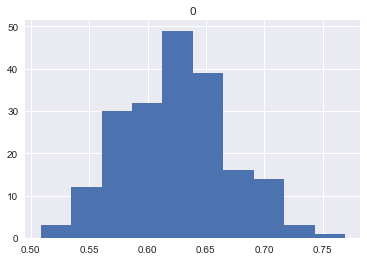

In [152]:
# see the distribution of  accuracies calculated by different sets of W
pd.DataFrame(accuracy).hist();

In [2]:
# see the distribution of accuracies of the model ( on 1683 users),  calculated by the best set of W
pd.DataFrame(Mil_iter[index]).hist();

NameError: name 'pd' is not defined

In [154]:
# these codes can be used to check results
#Counter({k:v for k,v in Counter(Y_test_event.loc[1682].to_dict()).items() if v>0})
#Counter({k: v for k, v in Counter(Y_test_event.iloc[1682].to_dict()).items() if v>0})
#Counter(X_dict_iter[0][1682]).most_common()